# SPRINT 8 - Projeto

#### Etapa 1 - Baixando e analisando os dados

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('datasets/users_behavior.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


O DataFrame está em ordem, sem valores ausentes e com os tipos de dados corretos.

#### Etapa 2 - Dividindo os dados

In [4]:
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

In [5]:
# Aqui, separei os dados em 60/40. Os 40% vão ser divididos na célula abaixo
features_train, features_temp, target_train, target_temp = train_test_split(
    features, target, test_size=0.4, random_state=22
)

In [6]:
# Dividi os 40% na metade, resultando em 20% para dados de validação e 20% para dados de teste
features_valid, features_test, target_valid, target_test = train_test_split(
    features_temp, target_temp, test_size=0.5, random_state=22
)

#### Etapa 3 - Testando modelos com conjunto de validação

##### 3.1 - Árvore de decisão

In [7]:
best_score = 0
best_depth = 0
for depth in range(1, 11):
    tree_model = DecisionTreeClassifier(random_state=22, max_depth=depth)
    tree_model.fit(features_train, target_train)
    score = tree_model.score(features_valid, target_valid)
    if score > best_score:
        best_score = score
        best_depth = depth
    print(f'max_depth = {depth}: {score}')
print()
print(f'Acurácia do melhor modelo de árvore de decisão (max_depth = {best_depth}): {best_score}')

max_depth = 1: 0.7822706065318819
max_depth = 2: 0.7993779160186625
max_depth = 3: 0.8087091757387247
max_depth = 4: 0.8040435458786936
max_depth = 5: 0.8102643856920684
max_depth = 6: 0.7916018662519441
max_depth = 7: 0.8055987558320373
max_depth = 8: 0.80248833592535
max_depth = 9: 0.807153965785381
max_depth = 10: 0.7947122861586314

Acurácia do melhor modelo de árvore de decisão (max_depth = 5): 0.8102643856920684


##### 3.2 - Floresta aleatória

In [8]:
best_score = 0
best_est = 0
for est in range(1, 11): # escolha o intervalo para o hiperparâmetro
    forest_model = RandomForestClassifier(random_state=22, n_estimators=est)
    forest_model.fit(features_train, target_train)
    score = forest_model.score(features_valid, target_valid)
    if score > best_score:
        best_score = score # salve o melhor resultado da acurácia no conjunto de validação
        best_est = est # salve o número de estimadores que correspondem ao melhor resultado de acurácia
    print(f'n_estimators = {est}: {score}')
print()
print(f'Acurácia do melhor modelo de floresta aleatória (n_estimators = {best_est}): {best_score}')

n_estimators = 1: 0.7340590979782271
n_estimators = 2: 0.7667185069984448
n_estimators = 3: 0.7776049766718507
n_estimators = 4: 0.7993779160186625
n_estimators = 5: 0.7931570762052877
n_estimators = 6: 0.7978227060653188
n_estimators = 7: 0.8055987558320373
n_estimators = 8: 0.8055987558320373
n_estimators = 9: 0.7993779160186625
n_estimators = 10: 0.8118195956454122

Acurácia do melhor modelo de floresta aleatória (n_estimators = 10): 0.8118195956454122


##### 3.3 - Regressão logística

In [9]:
logistic_regression_model = LogisticRegression(random_state=22, solver='liblinear')
logistic_regression_model.fit(features_train, target_train)
score = logistic_regression_model.score(features_valid, target_valid)
print(f'Acurácia do modelo de regressão logística: {score}')

Acurácia do modelo de regressão logística: 0.7231726283048211


Fiz testes com os 3 modelos de classificação que aprendi durante o sprint, e os dois com a melhor acurácia foram a árvore de decisão com profundidade 5 e floresta aleatória com 10 árvores.

#### Etapa 4 - Testando modelo com conjunto de teste

Como as acurácias da árvore de decisão e da floresta aleatória foram bem parecidas, vou fazer um teste pra cada modelo e decidir qual o modelo final que vou utilizar.

In [10]:
test_model = DecisionTreeClassifier(random_state=22, max_depth=5)
test_model.fit(features_train, target_train)

test_model_2 = RandomForestClassifier(random_state=22, n_estimators=10)
test_model_2.fit(features_train, target_train)

RandomForestClassifier(n_estimators=10, random_state=22)

In [11]:
test_score = test_model.score(features_test, target_test)
print(f'Acurácia do modelo de árvore de decisão escolhido: {test_score}')

test_score_2 = test_model_2.score(features_test, target_test)
print(f'Acurácia do modelo de floresta aleatória escolhido: {test_score_2}')

Acurácia do modelo de árvore de decisão escolhido: 0.7853810264385692
Acurácia do modelo de floresta aleatória escolhido: 0.7682737169517885


Para a minha surpresa, o modelo de árvore de decisão teve um melhor desempenho!

#### Etapa 5 - Tirando a prova real do modelo com uma matriz de confusão

In [12]:
final_model = test_model
predictions_test = final_model.predict(features_test)

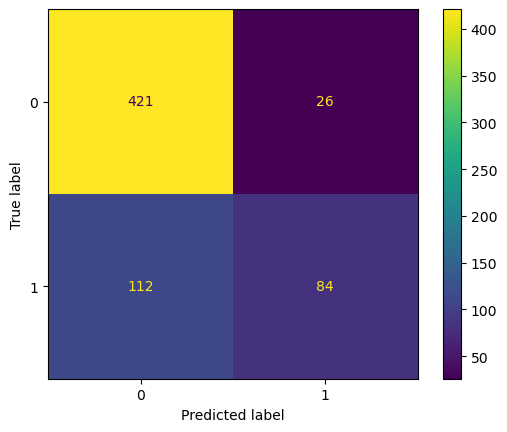

In [13]:
cm = confusion_matrix(target_test, predictions_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Parece que o modelo é melhor em prever 0 do que 1, mas pelo cálculo abaixo podemos ver nossa acurácia em uma prova real:

`(421 + 84)/(421 + 26 + 112 + 84) = 505/643 ≈ 78.6`

Acurácia do modelo de árvore de decisão escolhido: 0.7853810264385692

#### Conclusão

O projeto foi bem interessante, aprendi bastante sobre machine learning e como cada modelo tem seus prós e contras. No final, o modelo de árvore de decisão foi o modelo com a maior acurácia que consegui desenvolver, com uma acurácia de ≈ 78.6.